# 1. Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

C:\Users\Zaki Hamdard\AppData\Local\Temp\ipykernel_8536\3651252039.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# 2. Loading the Dataset

In [2]:
df = pd.read_csv("./force2020_data_unsupervised_learning.csv", index_col = 2)
df.head()

,RHOB,GR,NPHI,PEF,DTC
DEPTH_MD,,,,,
494.528,1.884186,80.200851,NaN,20.915468,161.131180
494.680,1.889794,79.262886,NaN,19.383013,160.603470
494.832,1.896523,74.821999,NaN,22.591518,160.173615
494.984,1.891913,72.878922,NaN,32.191910,160.149429
495.136,1.880034,71.729141,NaN,38.495632,160.128342


# 3. Clean the Dataset

In [3]:
df.dropna(inplace = True)
df.describe()

,RHOB,GR,NPHI,PEF,DTC
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000
mean,2.149947,61.253852,0.414572,3.912313,121.409905
std,0.251592,29.902708,0.139207,1.816933,30.394369
min,1.493417,6.191506,0.037976,1.126667,55.726753
25%,1.983767,42.792794,0.313797,2.629141,89.977041
50%,2.059335,62.886322,0.466891,3.365132,138.477173
75%,2.389839,77.726776,0.513840,4.686422,146.242302
max,2.889454,499.022583,0.800262,17.026619,163.910797


In [4]:

df.head()

,RHOB,GR,NPHI,PEF,DTC
DEPTH_MD,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085


# 4. Standardizing the data

In [5]:
scaler = StandardScaler()

df[["RHOB_T", "GR_T", "NPHI_T", "PEF_T", "DTC_T"]] = scaler.fit_transform(df[["RHOB", "GR", "NPHI", "PEF", "DTC"]])

In [6]:
df

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T
DEPTH_MD,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,-0.179292,2.523654,-1.255364,0.869531
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,-0.010859,2.770744,-1.247886,0.690042
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,0.028875,2.524300,-1.247450,0.554350
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,-0.008126,2.068584,-1.261572,0.585297
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,-0.092056,1.617342,-1.325067,0.752808
...,...,...,...,...,...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,1.265151,0.979338,-0.524699,0.433103,-1.149449
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,1.222550,0.921870,-0.456081,0.433103,-1.158891
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,1.110101,1.032560,-0.356250,0.433103,-1.105910


# 5. Clustering the data (2 variables)

In [9]:
def optimise_k_means(data, max_k):
    means = []
    inertia = []

    for k in range (1, max_k):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data)

        means.append(k)
        inertia.append(kmeans.inertia_)

    # Generate the Elbow Plot
    fit = plt.subplots(figsize = (10, 5))
    plt.plot(means, inertia, "o-")
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

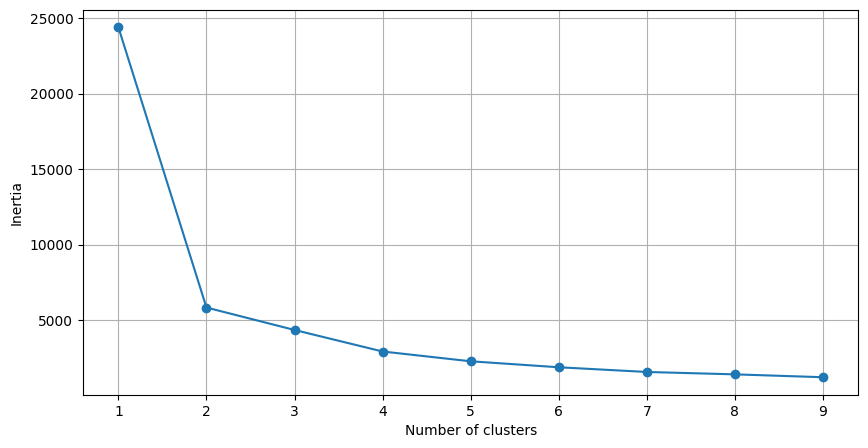

In [10]:
optimise_k_means(df[["RHOB_T", "NPHI_T"]], 10)

# 6. Applying K-Means Clustering

In [11]:
kmeans = KMeans(n_clusters = 3)

kmeans.fit(df[["NPHI_T", "RHOB_T"]])

df["kmeans3"] = kmeans.labels_

df

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T,kmeans3
DEPTH_MD,,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,-0.179292,2.523654,-1.255364,0.869531,1
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,-0.010859,2.770744,-1.247886,0.690042,1
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,0.028875,2.524300,-1.247450,0.554350,1
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,-0.008126,2.068584,-1.261572,0.585297,1
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,-0.092056,1.617342,-1.325067,0.752808,1
...,...,...,...,...,...,...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,1.265151,0.979338,-0.524699,0.433103,-1.149449,0
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,1.222550,0.921870,-0.456081,0.433103,-1.158891,0
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,1.110101,1.032560,-0.356250,0.433103,-1.105910,0


# 7. Plotting the results